In [17]:
import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
def _store_event(self, event):
    """
    Store price event for closing price and adjusted closing price
    """
    ticker = event.ticker
    # If the calc_adj_returns flag is True, then calculate
    # and store the full list of adjusted closing price
    # percentage returns in a list
    if self.calc_adj_returns:
        prev_adj_close = self.tickers[ticker][
            "adj_close"
        ] / PriceParser.PRICE_MULTIPLIER
        cur_adj_close = event.adj_close_price / PriceParser.PRICE_MULTIPLIER
        self.tickers[ticker][
            "adj_close_ret"
        ] = cur_adj_close / prev_adj_close - 1.0
        self.adj_close_returns.append(self.tickers[ticker]["adj_close_ret"])
    self.tickers[ticker]["close"] = event.close_price
    self.tickers[ticker]["adj_close"] = event.adj_close_price
    self.tickers[ticker]["timestamp"] = event.time

In [19]:
def obtain_prices_df(csv_filepath, end_date):
    """
    Obtain the prices DataFrame from the CSV file,
    filter by the end date and calculate the 
    percentage returns.
    """
    df = pd.read_csv(
        r"C:\Users\rnard\SPY.csv", header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Volume", "Adj Close"
        ],
        index_col="Date", parse_dates=True
    )
    df["Returns"] = df["Close"]
    return df

In [20]:
def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True,figsize=(15,15)
    )

    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()

Model Score: -11988.249782561781


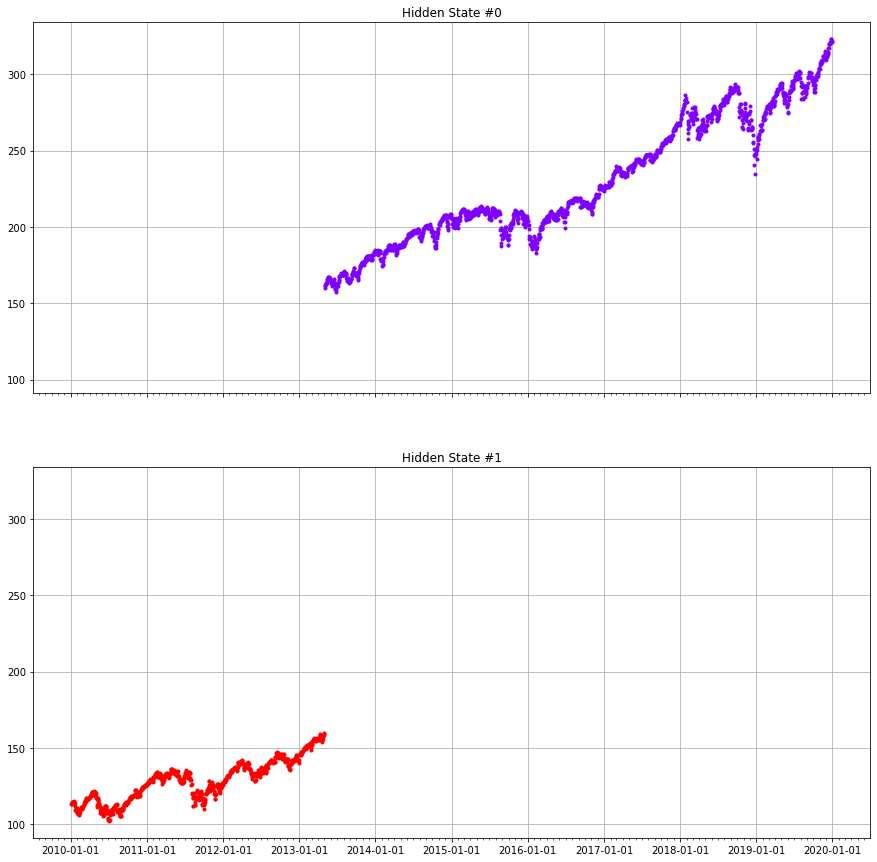

In [25]:
if __name__ == "__main__":
    # Hides deprecation warnings for sklearn
    warnings.filterwarnings("ignore")

    # Create the SPY dataframe from the Yahoo Finance CSV
    # and correctly format the returns for use in the HMM
    csv_filepath = "/path/to/your/data/SPY.csv"
    end_date = datetime.datetime(2019, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"]])

    # Create the Gaussian Hidden markov Model and fit it
    # to the SPY returns data, outputting a score
    hmm_model = GaussianHMM(
        n_components=2, covariance_type="full", n_iter=1000
    ).fit(rets)
    print("Model Score:", hmm_model.score(rets))
  
    # Plot the in sample hidden states closing values
    plot_in_sample_hidden_states(hmm_model, spy)
